<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_cluster_data_add_delta_1_2_n250_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/addition_pattern/addition_delta_1.2'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_1.2_n250.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,80.149530,34.272004,70.486930,-46.836173,148.072291,176.661588,-28.589297
1,0.0,1.0,39.235718,73.367086,79.996998,111.406775,314.006578,192.879569,121.127008
2,0.0,2.0,85.597094,46.538451,28.149531,18.824759,189.109835,176.647753,12.462081
3,0.0,3.0,32.656954,44.945753,45.126838,-2.367545,130.362000,116.249312,14.112688
4,0.0,4.0,80.326014,47.937472,82.904339,163.690949,384.858773,206.872411,177.986362
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,64.905407,78.204003,82.283677,17.564399,252.957485,203.508391,49.449094
249996,999.0,246.0,50.859911,71.255661,84.945717,195.730962,412.792250,181.669623,231.122627
249997,999.0,247.0,92.549493,42.030128,40.740624,49.077066,234.397311,201.335312,33.061999
249998,999.0,248.0,70.562321,30.917176,78.862313,-19.264337,171.077473,185.375297,-14.297824


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2  ...       y_hat       e_hat
rep   index                        ...                        
0.0   0.0    80.149530  34.272004  ...  176.661588  -28.589297
      1.0    39.235718  73.367086  ...  192.879569  121.127008
      2.0    85.597094  46.538451  ...  176.647753   12.462081
      3.0    32.656954  44.945753  ...  116.249312   14.112688
      4.0    80.326014  47.937472  ...  206.872411  177.986362
...                ...        ...  ...         ...         ...
999.0 245.0  64.905407  78.204003  ...  203.508391   49.449094
      246.0  50.859911  71.255661  ...  181.669623  231.122627
      247.0  92.549493  42.030128  ...  201.335312   33.061999
      248.0  70.562321  30.917176  ...  185.375297  -14.297824
      249.0  41.647353  79.759704  ...  176.904899   40.381150

[250000 rows x 7 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2  ...       y_hat       e_hat
rep   index                        ...                        
0.0   0.0    80.149530  34.272004  ...  176.661588  -28.589297
      1.0    39.235718  73.367086  ...  192.879569  121.127008
      2.0    85.597094  46.538451  ...  176.647753   12.462081
      3.0    32.656954  44.945753  ...  116.249312   14.112688
      4.0    80.326014  47.937472  ...  206.872411  177.986362
...                ...        ...  ...         ...         ...
999.0 245.0  64.905407  78.204003  ...  203.508391   49.449094
      246.0  50.859911  71.255661  ...  181.669623  231.122627
      247.0  92.549493  42.030128  ...  201.335312   33.061999
      248.0  70.562321  30.917176  ...  185.375297  -14.297824
      249.0  41.647353  79.759704  ...  176.904899   40.381150

[250000 rows x 7 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,80.149530,34.272004,70.486930,-46.836173,148.072291,176.661588,-28.589297
1,0.0,1.0,39.235718,73.367086,79.996998,111.406775,314.006578,192.879569,121.127008
2,0.0,2.0,85.597094,46.538451,28.149531,18.824759,189.109835,176.647753,12.462081
3,0.0,3.0,32.656954,44.945753,45.126838,-2.367545,130.362000,116.249312,14.112688
4,0.0,4.0,80.326014,47.937472,82.904339,163.690949,384.858773,206.872411,177.986362
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,64.905407,78.204003,82.283677,17.564399,252.957485,203.508391,49.449094
249996,999.0,246.0,50.859911,71.255661,84.945717,195.730962,412.792250,181.669623,231.122627
249997,999.0,247.0,92.549493,42.030128,40.740624,49.077066,234.397311,201.335312,33.061999
249998,999.0,248.0,70.562321,30.917176,78.862313,-19.264337,171.077473,185.375297,-14.297824


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2  ...       y_hat       e_hat
rep   index                        ...                        
0.0   0.0    80.149530  34.272004  ...  176.661588  -28.589297
      1.0    39.235718  73.367086  ...  192.879569  121.127008
      2.0    85.597094  46.538451  ...  176.647753   12.462081
      3.0    32.656954  44.945753  ...  116.249312   14.112688
      4.0    80.326014  47.937472  ...  206.872411  177.986362
...                ...        ...  ...         ...         ...
999.0 245.0  64.905407  78.204003  ...  203.508391   49.449094
      246.0  50.859911  71.255661  ...  181.669623  231.122627
      247.0  92.549493  42.030128  ...  201.335312   33.061999
      248.0  70.562321  30.917176  ...  185.375297  -14.297824
      249.0  41.647353  79.759704  ...  176.904899   40.381150

[250000 rows x 7 columns]

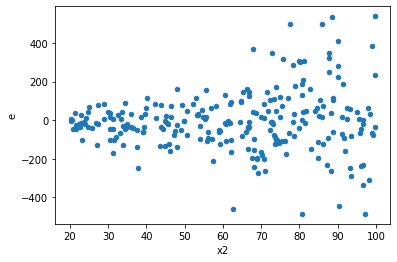

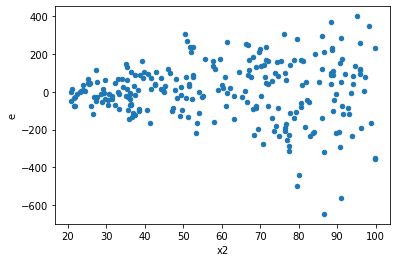

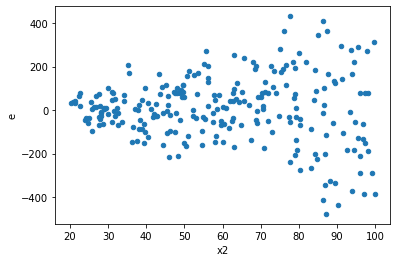

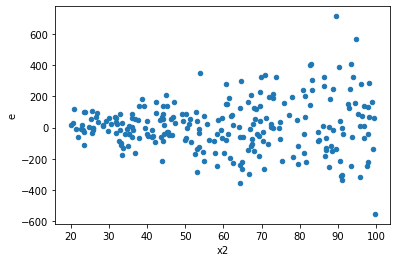

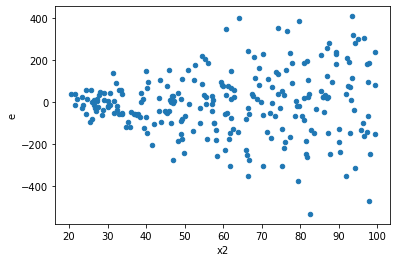

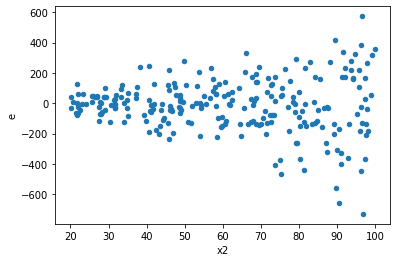

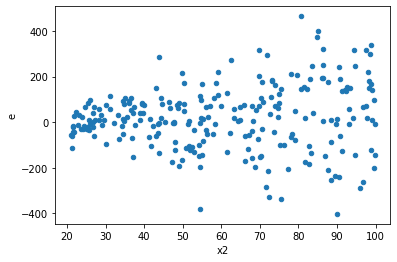

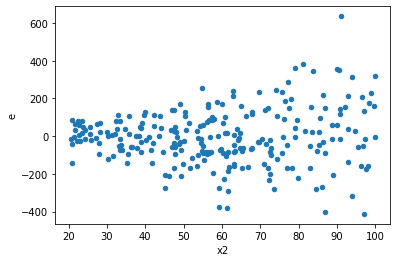

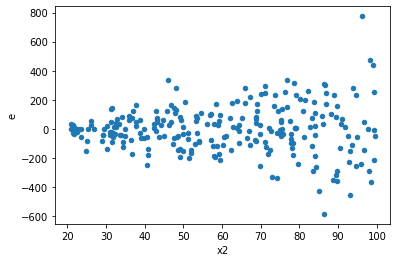

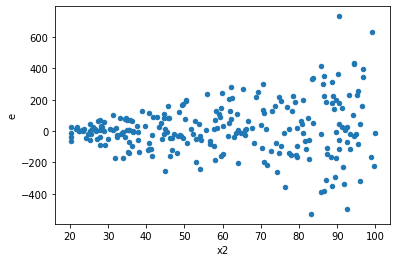

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["x1", "x2", "x3"]]
    k_means = KMeans(n_clusters=2)
    model = k_means.fit(x)
    model

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = k_means.predict(x)
    y_kmeans

    # kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    data_sort_clusters = data_clusters.sort_values('clusters')
    data_sort_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster1 = data_sort_clusters[data_sort_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSR1 = model1.ssr
    MSE1 = model1.mse_resid

    # กลุ่มที่ 2
    data_cluster0 = data_sort_clusters[data_sort_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model0 = sm.OLS(y, x).fit()

    DF0 = model0.df_resid + 1
    SSR0 = model0.ssr
    MSE0 = model0.mse_resid

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSR1/DF1) / (SSR0/DF0)

    df1 = DF1
    df0 = DF0

    # คำนวณค่า p-value
    # sf(x, dfn, dfd, loc=0, scale=1) : Survival function (also defined as 1 - cdf, but sf is sometimes more accurate)
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df0)))

    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df0)
    
    return df0, df1, SSR0, SSR1, MSE0, MSE1, GQ_test_clusters, two_tailed, p_greater

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df0=[]
list_df1=[]
list_SSR0=[]
list_SSR1=[]
list_MSE0=[]
list_MSE1=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df0, df1, SSR0, SSR1, MSE0, MSE1, GQ_test_clusters, two_tailed, p_greater=get_result(run_replicate)

    list_df0.append(df0)
    list_df1.append(df1)
    list_SSR0.append(SSR0)
    list_SSR1.append(SSR1)
    list_MSE0.append(MSE0)
    list_MSE1.append(MSE1)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df0":list_df0, "df1":list_df1, "SSR0":list_SSR0,
                     "SSR1":list_SSR1, "MSE0":list_MSE0, "MSE1":list_MSE1,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df0,df1,SSR0,SSR1,MSE0,MSE1,GQ_test_clusters,two_tailed,greater,Result_test
Replicate,,,,,,,,,,
5.0,123.0,121.0,3502865.268742103,3912748.1457253634,28712.010399525436,32606.234547711363,1.1354766351671632,0.4835574522948982,0.7582212738525509,Reject005=1 : Homoscedasticity
7.0,124.0,120.0,2067750.9522631813,3004520.3718651454,16810.983351733183,25248.070351807946,1.5014724319334556,0.025377787987291844,0.9873111060063541,Reject005=0 : Heteroscedasticity
10.0,129.0,115.0,1237761.3118182253,3999512.888487571,9670.010248579885,35083.44639024185,3.6246165289367336,3.8118397327480125e-12,0.9999999999980941,Reject005=0 : Heteroscedasticity
11.0,130.0,114.0,2680510.877738293,2842358.679358462,20779.154090994518,25153.61663149081,1.2092046483461303,0.2936919863026417,0.8531540068486791,Reject005=1 : Homoscedasticity
12.0,119.0,125.0,807018.8154793485,5299777.769159533,6839.142504062275,42740.143299673655,6.251884515533933,2.220446049250313e-16,0.9999999999999999,Reject005=0 : Heteroscedasticity
13.0,125.0,119.0,2589301.132267788,2612035.546994525,20881.460744095064,22135.894466055295,1.0596429994484706,0.7484161433294296,0.6257919283352852,Reject005=1 : Homoscedasticity
16.0,127.0,117.0,2891616.744053257,2937666.746743281,22949.339238517914,25324.7133339938,1.102756574234074,0.5882581582613833,0.7058709208693084,Reject005=1 : Homoscedasticity
17.0,112.0,132.0,2903115.5853882087,4565348.377433976,26154.194462956835,34849.987613999816,1.334300620272971,0.11634255804370985,0.9418287209781451,Reject005=1 : Homoscedasticity
18.0,114.0,130.0,860818.5952479484,5009901.479810222,7617.863674760605,38836.4455799242,5.103628389313801,2.220446049250313e-16,0.9999999999999999,Reject005=0 : Heteroscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df0":list_df0, "df1":list_df1, "SSR0":list_SSR0,
                     "SSR1":list_SSR1, "MSE0":list_MSE0, "MSE1":list_MSE1,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater"]].apply(lambda value: value[0] if value[0]<0.5 else 2*value[1], axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater"])
result_show.astype(str)

,df0,df1,SSR0,SSR1,MSE0,MSE1,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,119.0,125.0,3159257.416717984,2748255.0389980506,26773.367938287996,22163.347088693958,0.8281499263976234,0.2981369037107797,Reject005=1 : Homoscedasticity
1.0,134.0,110.0,4129166.4080078974,1754512.280019716,31046.36396998419,16096.442935960697,0.5176141497111242,0.0004047194775917248,Reject005=0 : Heteroscedasticity
2.0,102.0,142.0,2697115.160728856,2552612.2694970495,26704.1105022659,18103.63311700035,0.6798250910740038,0.03367208874729143,Reject005=0 : Heteroscedasticity
3.0,115.0,129.0,3481570.5906220516,2978025.359038341,30540.092900193435,23265.823117487038,0.7625376936478243,0.13445871792716782,Reject005=1 : Homoscedasticity
4.0,125.0,119.0,3003366.0735393884,2582299.420650562,24220.694141446682,21883.893395343744,0.9031531038915468,0.5758921719670725,Reject005=1 : Homoscedasticity
5.0,123.0,121.0,3502865.268742103,3912748.1457253634,28712.010399525436,32606.234547711363,1.1354766351671632,0.4835574522948982,Reject005=1 : Homoscedasticity
6.0,104.0,140.0,2211549.7698368947,2521505.580437677,21471.356988707714,18140.32791681782,0.846970959790075,0.35885386313902656,Reject005=1 : Homoscedasticity
7.0,124.0,120.0,2067750.9522631813,3004520.3718651454,16810.983351733183,25248.070351807946,1.5014724319334556,0.025377787987291844,Reject005=0 : Heteroscedasticity
8.0,110.0,134.0,3580028.8261813554,2809794.9321375308,32844.30115762712,21126.277685244593,0.6442819850365968,0.015315133044934552,Reject005=0 : Heteroscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    539
Reject005=1 : Homoscedasticity      461
Name: Result_test, dtype: int64